In [1]:
import pandas as pd

import metricio

In [2]:
meta, data = metricio.read_metrics('data.txt')

In [3]:
# import csv
# with open('data_copy.csv', 'w+', encoding='UTF-8') as file:
#     for key, value in data.items():
#         csv.writer(file, value)

In [4]:
data_dict = {key: [features[meta.index(key)] for features in data.values()] for key in meta}
my_data = pd.DataFrame(data_dict)
keys = data.keys()
my_data = my_data.rename(dict(zip(range(len(keys)), keys)), axis=0)

In [5]:
my_data.to_csv('data_copy.csv')

In [6]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

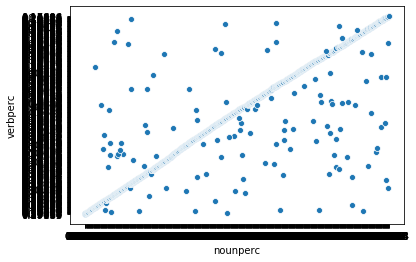

In [7]:
sns.scatterplot(x='nounperc', y='verbperc', data=my_data)